In [1]:
!pip install hstrat downstream iplotx teeplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.3/888.3 kB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.3/340.3 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.1/465.1 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [2]:
import seaborn as sns
import cupy as xp

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!wget https://raw.githubusercontent.com/mmore500/hstrat-synthesis/refs/heads/main/pylib/track_ca.py

--2026-01-30 15:33:55--  https://raw.githubusercontent.com/mmore500/hstrat-synthesis/refs/heads/main/pylib/track_ca.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16892 (16K) [text/plain]
Saving to: ‘track_ca.py.1’

track_ca.py.1       100%[===================>]  16.50K  --.-KB/s    in 0.002s  

2026-01-30 15:33:55 (9.18 MB/s) - ‘track_ca.py.1’ saved [16892/16892]



In [5]:
import pickle

with open("/content/drive/MyDrive/mrca_variance.pkl", "rb") as f:
    mrca_variances = pickle.load(f)
with open("/content/drive/MyDrive/phylos.pkl", "rb") as f:
    phylos = pickle.load(f)

<Axes: >

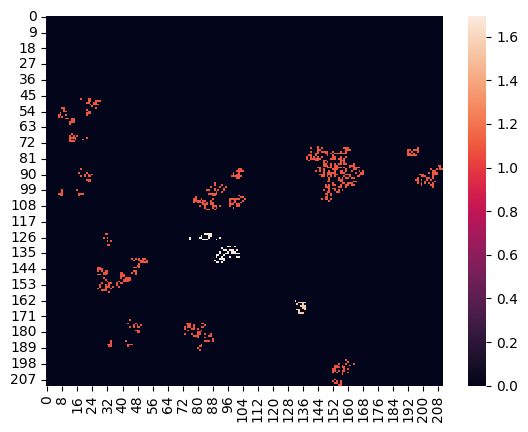

In [6]:
df = phylos[0]
grid_size = int(df[df["state"] >= 0][["row", "col"]].to_numpy().max()) + 1
grid = xp.zeros((grid_size, grid_size))
for _, row in df[(df["state"] >= 0) & df["extant"]].iterrows():
    grid[int(row["row"]), int(row["col"])] = (
        mrca_variances[row["dstream_data_id"]] + 1
    )
sns.heatmap(grid.get())

In [8]:
from track_ca import plot_phylo_at

for p in phylos:
    p["gol_state"] = p["state"]
    p["taxon_label"] = p["id"]

teeplots/rank=1500+viz=subplots+ext=.pdf
teeplots/rank=1500+viz=subplots+ext=.png


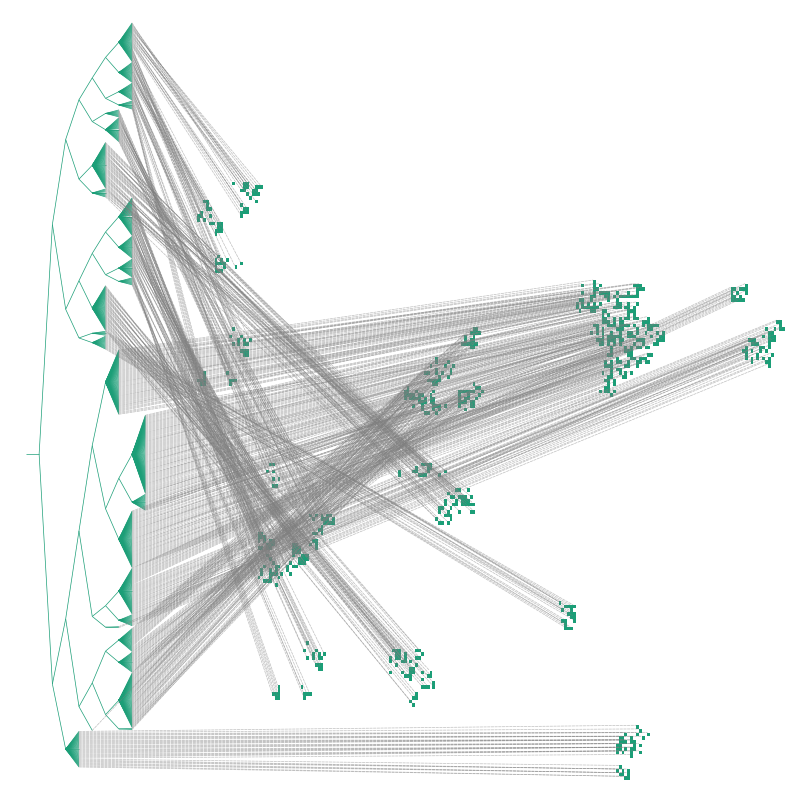

In [10]:
plot_phylo_at(phylos[0], ".")

teeplots/rank=1500+viz=subplots+ext=.pdf
teeplots/rank=1500+viz=subplots+ext=.png


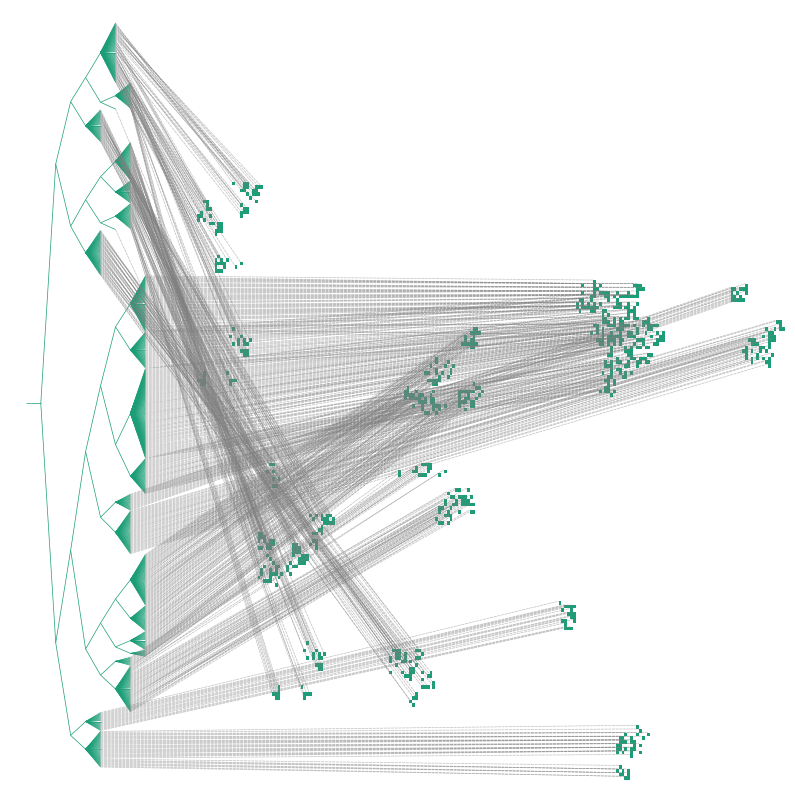

In [9]:
plot_phylo_at(phylos[1], ".")